# Ford Go Bike 2017
## by Marcello Victorino
*06/2019*

## Investigation Overview

This project analyzes the distribution of trips of the bike-sharing system Ford Go Bike, in San Francisco (USA) Bay Area, taken from June through December of 2017 (total of 443,121 observations).

The main goal is to perform an Exploratory Data Analysis in order to identify interesting insights, looking for patterns, relationships and correlations between all features.
The analysis is presented in the following structure:
1. What is the distribution of these bike-share trips?
2. Is there any usage pattern?
3. How does Subscribers behave in comparison to Sporadic Users?
4. Key Insights and Recommendations

## Dataset Overview

The Ford Go Bike is the Bike-share system operating in the Bay Area, San Francisco (USA). With around 6.400 bikes in more than 360 stations across San Francisco, East Bay and San Jose, there are basically two types of subscription:

1. **Subscriber**: Membership can be Monthly (\\$15/mo) or Annual (\\$150/yr, equivalent to \\$12.50/mo). It grants unlimited 45-minutes trips
2. **Sporadic Customer**: Single ride (\\$2 per trip) and Access Pass (\\$10), granting unlimited 30-minute rides within 24 hours.

The [dataset](<https://www.fordgobike.com/system-data>) is open to the public, containing station and user data for each trip. At the time of this project, is was possible to download historic data from June, 2017 up to April, 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Clean_FordGoBike_2017.csv')
df['weekend'] = np.where(df.weekday >= 5,1,0)

## 1. What is the distribution of these bike-share trips?

Brief description of the distribution of trips taken from June to December of 2017:

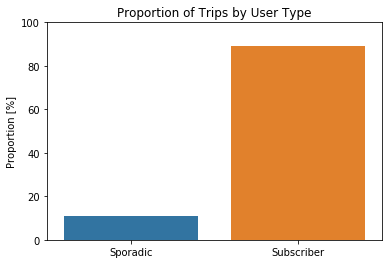

In [3]:
g = df.subscriber.value_counts(normalize=True)
sns.barplot(x=g.keys(), y=g.values*100)
plt.ylim(0,100)
plt.title(f'Proportion of Trips by User Type')
plt.xticks([0,1], ['Sporadic', 'Subscriber'])
plt.ylabel('Proportion [%]');

Almost 90% of the trips were taken by actual subscribers of the Ford Go Bike program.

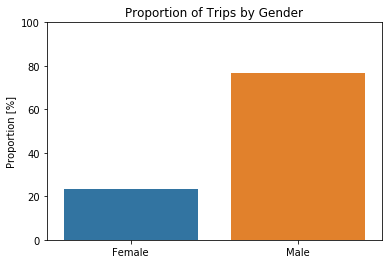

In [4]:
g = df.gender.value_counts(normalize=True)
sns.barplot(x=g.keys(), y=g.values*100)
plt.ylim(0,100)
plt.title(f'Proportion of Trips by Gender')
plt.xticks([0,1], ['Female', 'Male'])
plt.ylabel('Proportion [%]');

The vast majority of trips were taken by men (77%).

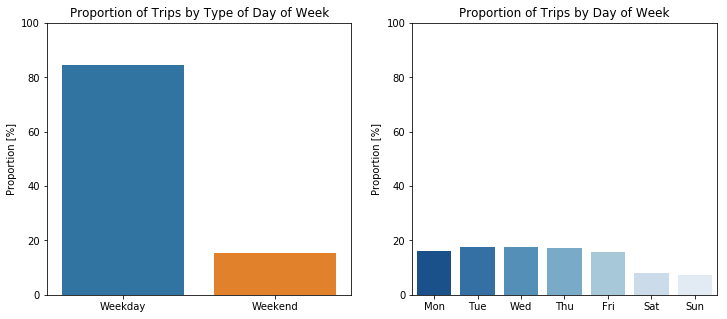

In [5]:
plt.figure(figsize=(12,5))

plt.subplot(121)
g = df.weekend.value_counts(normalize=True)
sns.barplot(x=g.keys(), y=g.values*100)
plt.ylim(0,100)
plt.title(f'Proportion of Trips by Type of Day of Week')
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.ylabel('Proportion [%]');

plt.subplot(122)
g = df.weekday.value_counts(normalize=True)
sns.barplot(x=g.keys(), y=g.values*100, palette='Blues_r')
plt.ylim(0,100)
plt.title(f'Proportion of Trips by Day of Week')
plt.xticks(range(7), ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);
plt.ylabel('Proportion [%]');

Interestingly, the weekends actually have significant less trips (15%), whereas the weekday trips seems to be uniformly distributed around 17%.

This pattern suggests the majority of trips are actually completed for commuting purposes.

## 2. Is there any usage pattern?

Let's further investigate the distribution of trips along the hours of the day:

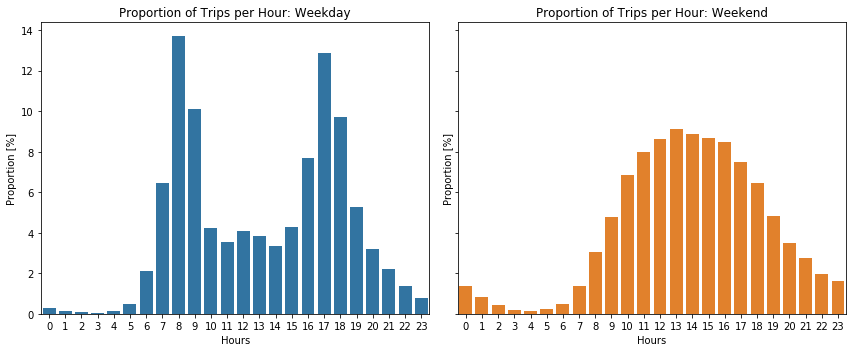

In [6]:
fig, axes = plt.subplots(1,2, sharey=True, figsize=(12,5))

weekday = df.query('weekday not in (5,6)')
weekday_hours = weekday.hour.value_counts(normalize=True)
sns.barplot(x= weekday_hours.keys(), y= weekday_hours.values*100, color=sns.color_palette()[0], ax=axes[0])

axes[0].set_title('Proportion of Trips per Hour: Weekday')
axes[0].set_ylabel('Proportion [%]')
axes[0].set_xlabel('Hours')

weekend = df.query('weekday in (5,6)')
weekend_hours = weekend.hour.value_counts(normalize=True)
sns.barplot(x= weekend_hours.keys(), y= weekend_hours.values*100, color=sns.color_palette()[1], ax=axes[1])

plt.title(f'Proportion of Trips per Hour: Weekend')
plt.ylabel('Proportion [%]')
plt.xlabel('Hours');

plt.tight_layout()

Separating the trips between Weekday and Weekend, it is possible to see a clear commuting pattern for trips occurring during weekdays.

There are two peaks of usage around 8h and 17h, depicting the typical pendular pattern of home-work and work-home trips.

In [7]:
variables_interest = ['subscriber', 'gender','duration_min', 'user_age', 'weekday','hour']
df2 = df[variables_interest]

df3 = df2.query('user_age <60 & duration_min < 30')

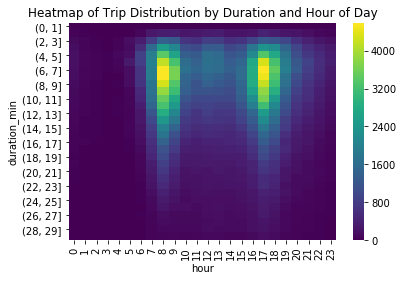

In [8]:
sns.heatmap(df3.pivot_table(index=pd.cut(df3.duration_min, bins=range(0,61)),
                                columns=df3.hour, aggfunc='count',
                                fill_value=0).gender, vmin=0,cmap='viridis');
plt.title('Heatmap of Trip Distribution by Duration and Hour of Day');

As seen before, most trips occurs in two peaks (around 8h and 17h). But this heatmap shows they usually take between 5 and 10 minutes, suggesting really short trips.

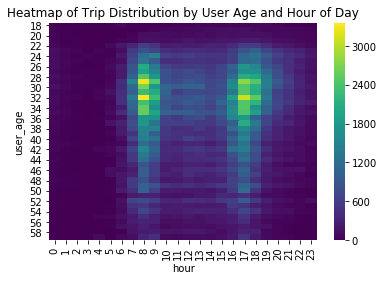

In [9]:
# User Age vs Hour of day

sns.heatmap(df3.pivot_table(index=df3.user_age, columns=df3.hour, aggfunc='count', fill_value=0).gender,
            vmin=0,cmap='viridis');
plt.title('Heatmap of Trip Distribution by User Age and Hour of Day');

There is no clear correlation between user age and the time the trip occurs, suggesting users of all ages are using the bike-share to commute.

## 3. How does Subscribers behave in comparison to Sporadic Users?
Now let's stratify the analysis by the type of user:

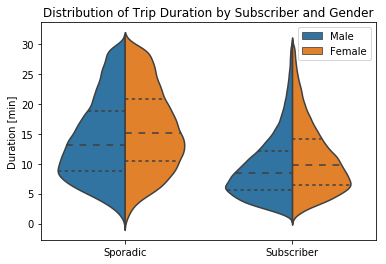

In [28]:
# Trip Duration vs Subscriber vs Gender
sns.violinplot(data=df3, y='duration_min', x='subscriber', hue='gender', split=True, orient='v', inner='quartile',
              hue_order=[1,0]);
plt.title('Distribution of Trip Duration by Subscriber and Gender')
plt.ylabel('Duration [min]')
plt.xlabel('')
L = plt.legend()
L.get_texts()[0].set_text('Male')
L.get_texts()[1].set_text('Female')
plt.xticks([0,1], ['Sporadic','Subscriber']);

Even though subscribers have access to unlimited 45-minutes trips, looks like their trips are typically shorter than Non-subscribers.

This could be explained due to the fact that subscribers usually take the bike for mobility purpose (trip as a mean of transportation), whereas occasional users could represent tourists using the bike for leisure and getting to know the city.

There is not a significant difference in trip duration based on gender. Specially for Subscribers.

In [11]:
subscriber1 = df2.query('subscriber == 1 & duration_min < 30')
subscriber0 = df2.query('subscriber == 0 & duration_min < 30')

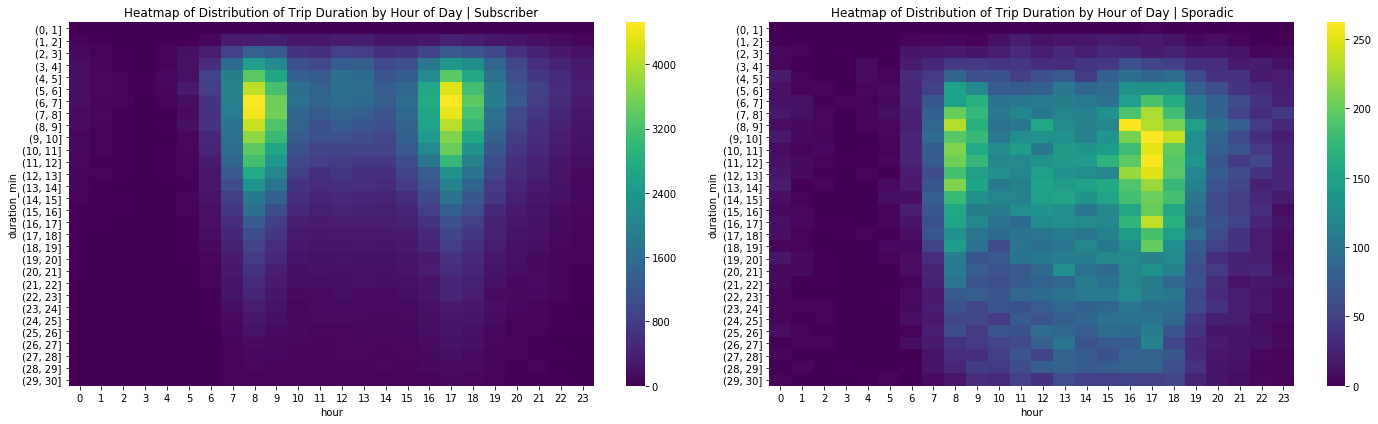

In [12]:
# Trip duration vs Hour Day - count
plt.figure(figsize=(20,6))

plt.subplot(121)
trip_duration_bins = pd.cut(subscriber1.duration_min, bins=range(0,61))
sns.heatmap(subscriber1.pivot_table(index=trip_duration_bins, columns=subscriber1.hour, aggfunc='count', fill_value=0).gender, vmin=0,
           cmap='viridis');
plt.title('Heatmap of Distribution of Trip Duration by Hour of Day | Subscriber');

plt.subplot(122)
trip_duration_bins = pd.cut(subscriber0.duration_min, bins=range(0,61))
sns.heatmap(subscriber0.pivot_table(index=trip_duration_bins, columns=subscriber0.hour, aggfunc='count', fill_value=0).gender, vmin=0,
           cmap='viridis');
plt.title('Heatmap of Distribution of Trip Duration by Hour of Day | Sporadic');

plt.tight_layout()

There is a clear difference in the bike usage pattern between subscribers and sporadic users along the hours of the day:
+ **Subscribers**: 
    - thre are two clear peaks of usage, around 8h and 17h - supporting commuting pattern
    - both peaks concentrate trips taking between 5 and 10 minutes - supporting commuting pattern
    
+ **Sporadic**: 
    - although more spread out, there is one clear peak of usage, around 17h. But significant usage starting at 8h and ending by 19h
    - although more spread out, most trips take from 7 up to 15 minutes

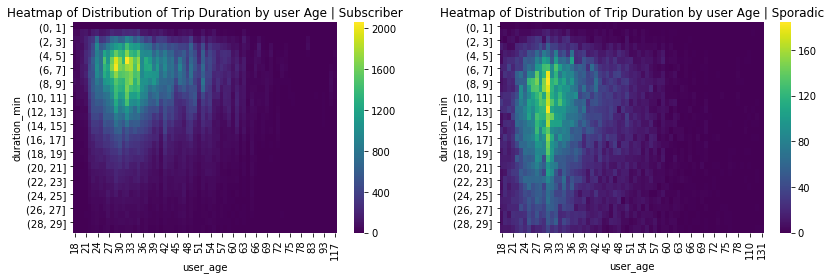

In [13]:
# Trip duration vs User age - count vs Subscriber
plt.figure(figsize=(12,4))

plt.subplot(121)
trip_duration_bins = pd.cut(subscriber1.duration_min, bins=range(0,61))
sns.heatmap(subscriber1.pivot_table(index=trip_duration_bins, columns=subscriber1.user_age, aggfunc='count',
                                fill_value=0).gender, vmin=0,cmap='viridis');
plt.title('Heatmap of Distribution of Trip Duration by user Age | Subscriber');

plt.subplot(122)
trip_duration_bins = pd.cut(subscriber0.duration_min, bins=range(0,61))
sns.heatmap(subscriber0.pivot_table(index=trip_duration_bins, columns=subscriber0.user_age, aggfunc='count',
                                fill_value=0).gender, vmin=0,cmap='viridis');
plt.title('Heatmap of Distribution of Trip Duration by user Age | Sporadic');

plt.tight_layout()

There is a clear difference in the bike usage pattern between subscribers and sporadic users:
+ **Subscribers**: 
    - the vast majority of users are between 25 and 35 years old
    - riding from 5 up to 10 minutes
    
+ **Sporadic**: 
    - the vast majority of users are between 28 and 30 years old - much more concentrated
    - riding from 7 up to 20 minutes - much more spreaded out

## Key Insights:
+ The vast majority of trips are taken by subscribers (90%). Of those, most trips are taken by users between 25 and 35 years old, riding from 5 to 10 minutes. These trips are concentrated in two peaks (8h and 17h), clearly suggesting a commuting pattern.
+ No significant influence of gender on characteristics of trips taken.

## Recommendations:
+ Not many young adults (less than 20 years) using the system. Further investigate why and target this audience to increase number of users.
+ Vast majority of trips seem to be taken for commuting purpose. Try to target advertising and offer special pricing for tourists in order to increase number of sporadic users.